In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


In [94]:
df_mca=pd.read_csv('marketing_customer_analysis.csv')

In [95]:
cols=[]
for i in range (len(df_mca.columns)):
    cols.append(df_mca.columns[i].lower())
df_mca.columns=cols
df_mca.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [96]:
df_mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [97]:
#Show DataFrame info.
#Describe DataFrame.
#Show a plot of the total number of responses.
#Show a plot of the response rate by the sales channel.
#Show a plot of the response rate by the total claim amount.
#Show a plot of the response rate by income.

In [98]:
#df_mca.info()
df_mca['response'].value_counts().sum()

9134

In [99]:
df_mca[df_mca['response']=='Yes'].value_counts().sum()

1308

In [100]:
tot_response=pd.DataFrame({'tot response':[df_mca[df_mca['response']=='Yes'].value_counts().sum()]})
tot_response.head()

,tot response
0,1308


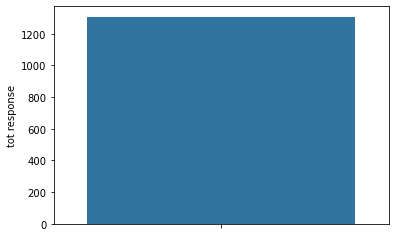

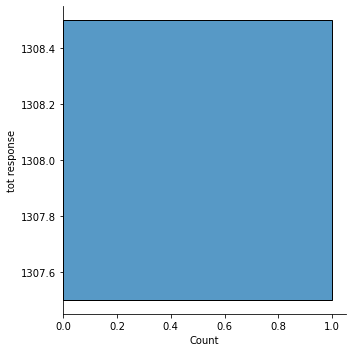

In [127]:
sns.barplot(y='tot response', data=tot_response)
plt.show()
sns.displot(y='tot response', data=tot_response)
plt.show()

In [135]:
responserate=round(((df_mca[df_mca['response']=='Yes'].value_counts().sum())/(df_mca['response'].value_counts().sum()))*100,2)
print(responserate)

14.32


In [15]:
df_mcasummary=df_mca.describe(include='all').T
display(df_mcasummary)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


In [153]:
filteredresponses=df_mca[df_mca['response']=='Yes']
display(filteredresponses)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
13,SJ95423,Arizona,8819.018934,Yes,Basic,High School or Below,1/10/11,Employed,M,99845,...,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.000000,SUV,Medsize
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,RA89822,California,34611.378960,Yes,Basic,High School or Below,1/14/11,Employed,F,20090,...,59,0,2,Personal Auto,Personal L2,Offer2,Agent,523.200000,Sports Car,Medsize
9119,YX35990,California,5479.555081,Yes,Basic,Master,1/13/11,Employed,M,56005,...,30,1,3,Corporate Auto,Corporate L2,Offer1,Branch,326.400000,Four-Door Car,Small
9122,FH43628,California,25464.820590,Yes,Extended,College,2/1/11,Retired,F,13663,...,66,0,2,Personal Auto,Personal L2,Offer1,Branch,465.600000,Four-Door Car,Small
9123,WZ45103,California,5678.050167,Yes,Extended,Bachelor,1/19/11,Unemployed,F,0,...,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small


In [168]:
filteredresponses.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer,1308,1308,OC83172,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1308,5,California,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,1308.0,NaN,NaN,NaN,7854.871361,6255.638229,2004.350666,3933.813993,5596.257433,9075.768214,41787.90343
response,1308,1,Yes,1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,1308,3,Basic,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1308,5,College,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,1308,57,1/26/11,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,1308,5,Employed,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1308,2,F,660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,1308.0,NaN,NaN,NaN,38544.027523,28043.637944,0.0,18495.0,32234.0,60880.0,99845.0


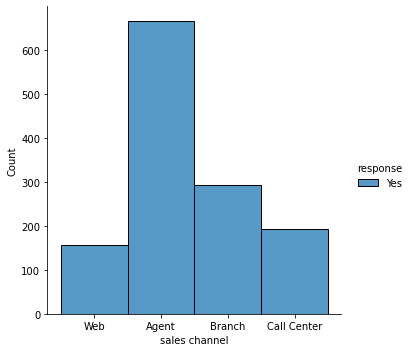

In [155]:
sns.displot(x='sales channel', hue = 'response', data=filteredresponses, multiple='stack')
plt.show()

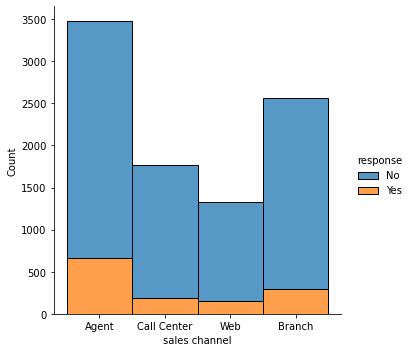

In [156]:
sns.displot(x='sales channel', hue = 'response', data=df_mca, multiple='stack')
plt.show()

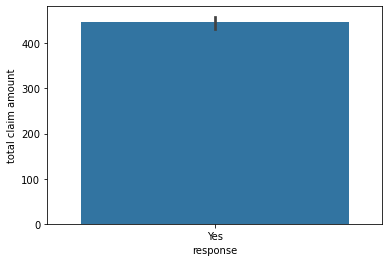

In [159]:
sns.barplot(x='response', y = 'total claim amount', data=filteredresponses)
plt.show()

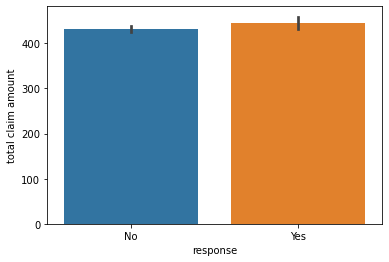

In [140]:
sns.barplot(x='response', y = 'total claim amount', data=df_mca)
plt.show()

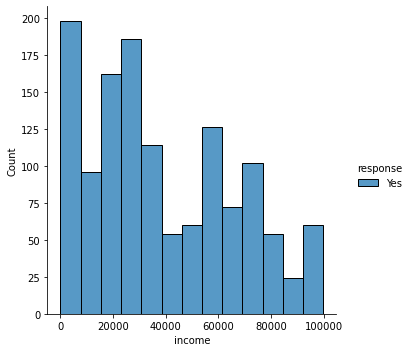

In [163]:
sns.displot(x='income', hue = 'response', data=filteredresponses, multiple='stack')
plt.show()
#sns.scatterplot(x=filteredresponses['income'], y=filteredresponses['response'])
#plt.show()

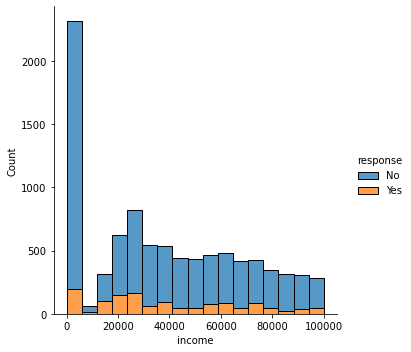

In [148]:
sns.displot(x='income', hue = 'response', data=df_mca, multiple='stack')
plt.show()
#sns.scatterplot(x=df_mca['income'], y=df_mca['response'])
#plt.show()

In [ ]:
#fig, ax1 = plt.subplots(2,1,figsize=(10,10)) # figsize=(width,height)
#sns.boxplot(y='gender',x='median_home_val', data=data, ax = ax1[0])
#sns.histplot(x='median_home_val', hue='gender', data=data, ax = ax1[1])
#plt.show()